### Visualizing the distribution of the observations

### Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

Populating the interactive namespace from numpy and matplotlib


In [2]:
### Read the data frame from pickle file

data_dir='../../Data/Weather'
file_index='SBSBBSSB'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

import pickle
List=pickle.load(open(data_dir+'/US_Weather_SBSBBSSB.csv','rb'))
len(List)

df=sqlContext.createDataFrame(List)
print df.count()

df.show(20)

keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12655
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|    124.1| 46.2667|-119.1167|       TMAX|USW00024163|    36|[00 7E 00 7E 00 7...|1998.0|SBSBBSSB|
|    124.1| 46.2667|-119.1167|       TMAX|USW00024163|     1|[80 54 30 54 40 C...|1999.0|SBSBBSSB|
|    124.1| 46.2667|-119.1167|       TMAX|USW00024163|     3|[30 55 E0 55 80 5...|2000.0|SBSBBSSB|
|    124.1| 46.2667|-119.1167|       TMAX|USW00024163|     3|[20 50 80 51 00 4...|2001.0|SBSBBSSB|
|    124.1| 46.2667|-119.1167|       TMAX|USW00024163|     1|[E0 50 80 51 30 5...|2002.0|SBSBBSSB|
|    124.1| 46.2667|-119.1167|       TMAX|USW00024163|     1|[80 54 50 57 58 5...|2003.0|SBSBBSSB|
|    124.1| 46.2667|-119.1167|       T

### How does weather change with elevation?
Visualize how the different measurements change across elevation for a particular year

Row(year=1971.0, count=194)
len(elevations) 37


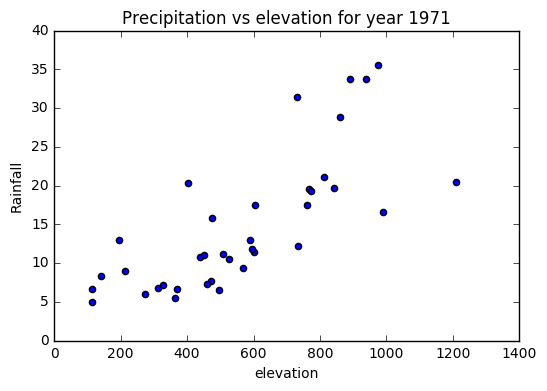

len(elevations) 31
len(elevations) 31


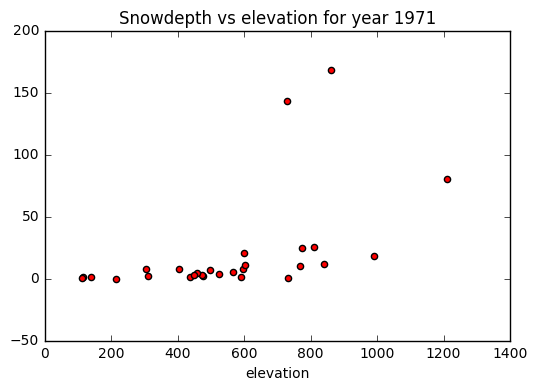

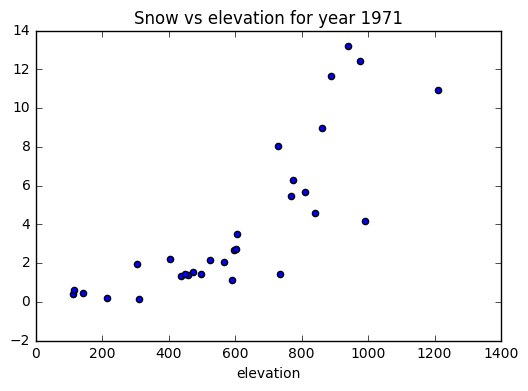

len(elevations2) 30
len(elevations2) 33
len(elevations3) 30


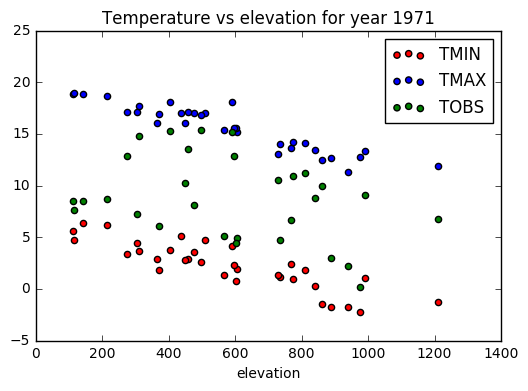

In [3]:
sqlContext.registerDataFrameAsTable(df,'weather')

# Analyse for the year with the maximum overall observations
print df.groupBy('year').count().sort('count').collect()[-1]

# PRCP
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('PRCP',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
elevations =df1.rdd.map(lambda row:row['elevation']).collect()
print 'len(elevations)',len(elevations)
Prec =np.vstack(rows)
#T=T/10.  # scaling to make the temperature be in centigrades
Prec = np.nanmean(Prec, axis = 1)

plt.scatter(elevations, Prec)
plt.title('Precipitation vs elevation for year 1971')
plt.xlabel('elevation')
plt.ylabel('Rainfall')
plt.show()

# SNOW
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('SNWD',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
elevations1 = df1.rdd.map(lambda row:row['elevation']).collect()
print 'len(elevations)',len(elevations1)
SnowDepth=np.vstack(rows)
SnowDepth = np.nanmean(SnowDepth, axis = 1)

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('SNOW',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
elevations2 =df1.rdd.map(lambda row:row['elevation']).collect()
print 'len(elevations)',len(elevations1)
Snow=np.vstack(rows)
Snow = np.nanmean(Snow, axis = 1)


plt.scatter(elevations1, SnowDepth, c = 'r')
plt.title('Snowdepth vs elevation for year 1971')
plt.xlabel('elevation')
plt.show()


plt.scatter(elevations2, Snow, c = 'b')
plt.title('Snow vs elevation for year 1971')
plt.xlabel('elevation')
plt.show()


# TMIN, TOBS TMAX

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('TMIN',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
elevations1 =df1.rdd.map(lambda row:row['elevation']).collect()
print 'len(elevations2)',len(elevations2)
Tmin=np.vstack(rows)
Tmin=Tmin/10.  # scaling to make the temperature be in centigrades
Tmin = np.nanmean(Tmin, axis = 1)

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('TMAX',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
elevations2 =df1.rdd.map(lambda row:row['elevation']).collect()
print 'len(elevations2)',len(elevations2)
Tmax=np.vstack(rows)
Tmax=Tmax/10.  # scaling to make the temperature be in centigrades
Tmax = np.nanmean(Tmax, axis = 1)

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('TOBS',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
elevations3 =df1.rdd.map(lambda row:row['elevation']).collect()
print 'len(elevations3)',len(elevations3)
Tobs=np.vstack(rows)
Tobs=Tobs/10.  # scaling to make the temperature be in centigrades
Tobs = np.nanmean(Tobs, axis = 1)


plt.scatter(elevations1, Tmin, c = 'r', label = 'TMIN')
plt.scatter(elevations2, Tmax, c = 'b', label = 'TMAX')
plt.scatter(elevations3, Tobs, c = 'g', label = 'TOBS')
plt.title('Temperature vs elevation for year 1971')
plt.legend(loc = 'upper right')
plt.xlabel('elevation')
plt.show()



### How does weather change with longitude?
Visualize how the different measurements change across elevation for a particular year
That is, how does weather change when we move away from the coast

len(longs) 37


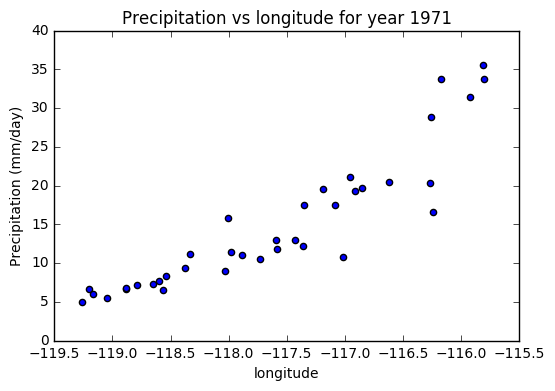

len(longs1) 31
len(longs2) 30


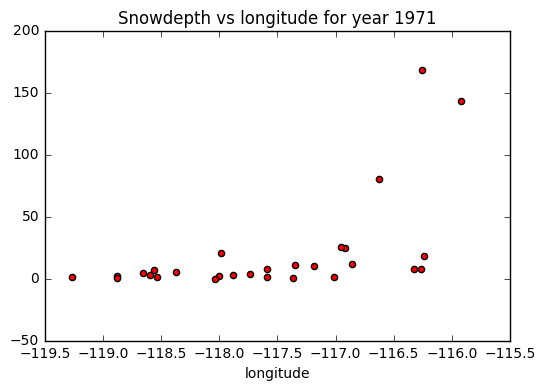

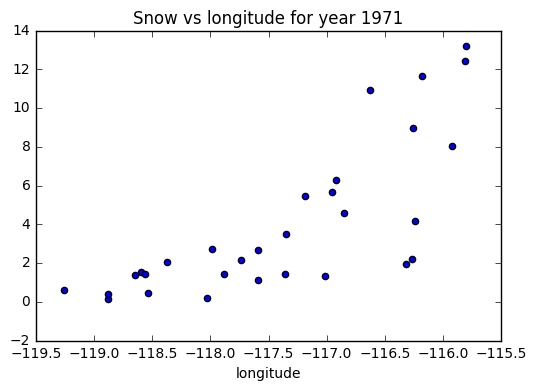

len(longs1) 33
len(longs2) 33
len(longs3) 30


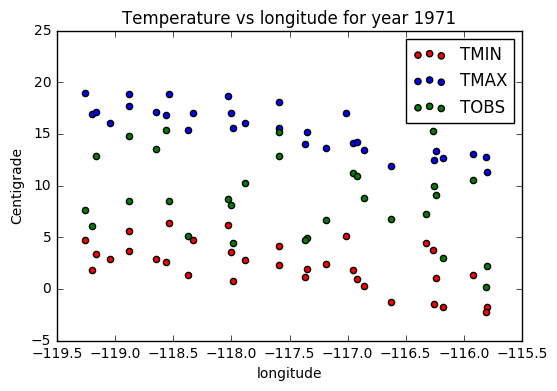

In [5]:
# PRCP
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('PRCP',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
longs =df1.rdd.map(lambda row:row['longitude']).collect()
print 'len(longs)',len(longs)
Prec =np.vstack(rows)
#T=T/10.  # scaling to make the temperature be in centigrades
Prec = np.nanmean(Prec, axis = 1)

plt.scatter(longs, Prec)
plt.title('Precipitation vs longitude for year 1971')
plt.xlabel('longitude')
plt.ylabel('Precipitation (mm/day)')
plt.show()

# SNOW
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('SNWD',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
longs1 =df1.rdd.map(lambda row:row['longitude']).collect()
print 'len(longs1)',len(longs1)
SnowDepth=np.vstack(rows)
SnowDepth = np.nanmean(SnowDepth, axis = 1)

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('SNOW',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
longs2 =df1.rdd.map(lambda row:row['longitude']).collect()
print 'len(longs2)',len(longs2)
Snow=np.vstack(rows)
Snow = np.nanmean(Snow, axis = 1)


plt.scatter(longs1, SnowDepth, c = 'r')
plt.title('Snowdepth vs longitude for year 1971')
plt.xlabel('longitude')
plt.show()


plt.scatter(longs2, Snow, c = 'b')
plt.title('Snow vs longitude for year 1971')
plt.xlabel('longitude')
plt.show()


# TMIN, TOBS TMAX

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('TMIN',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
longs1 =df1.rdd.map(lambda row:row['longitude']).collect()
print 'len(longs1)',len(longs1)
Tmin=np.vstack(rows)
Tmin=Tmin/10.  # scaling to make the temperature be in centigrades
Tmin = np.nanmean(Tmin, axis = 1)

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('TMAX',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
longs2 =df1.rdd.map(lambda row:row['longitude']).collect()
print 'len(longs2)',len(longs2)
Tmax=np.vstack(rows)
Tmax=Tmax/10.  # scaling to make the temperature be in centigrades
Tmax = np.nanmean(Tmax, axis = 1)

Query="SELECT * FROM weather\n\tWHERE measurement='%s' and year='%s'"%('TOBS',1971.0)
df1 = sqlContext.sql(Query)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
longs3 =df1.rdd.map(lambda row:row['longitude']).collect()
print 'len(longs3)',len(longs3)
Tobs=np.vstack(rows)
Tobs=Tobs/10.  # scaling to make the temperature be in centigrades
Tobs = np.nanmean(Tobs, axis = 1)


plt.scatter(longs1, Tmin, c = 'r', label = 'TMIN')
plt.scatter(longs2, Tmax, c = 'b', label = 'TMAX')
plt.scatter(longs3, Tobs, c = 'g', label = 'TOBS')
plt.title('Temperature vs longitude for year 1971')
plt.legend(loc = 'upper right')
plt.xlabel('longitude')
plt.ylabel('Centigrade')
plt.show()



### Script for plotting yearly plots

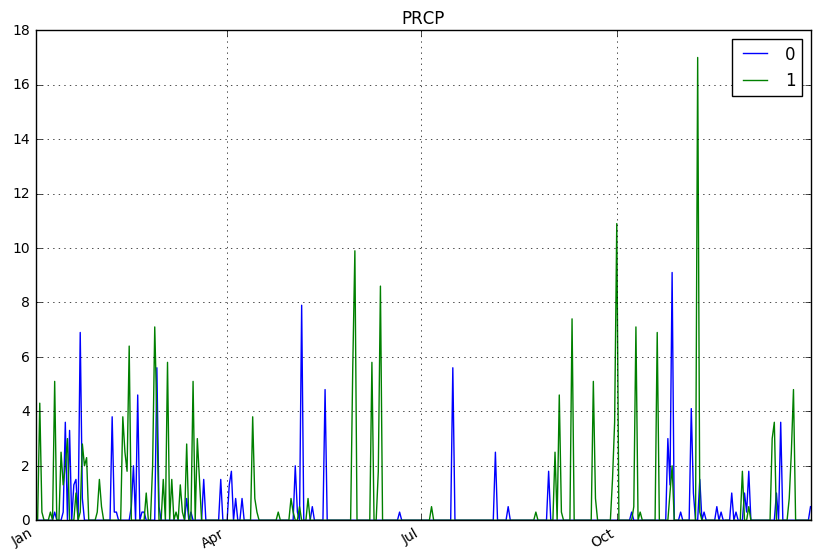

In [22]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(T[:2,:].transpose(),fig,ax,title='PRCP')
#title('A sample of graphs');

### Distribution of missing observations
The distribution of missing observations is not uniform throughout the year. We visualize it below.

In [10]:
def plot_pair(pair,func):
    j=0
    fig,X=subplots(1,2,figsize=(16,6))
    axes=X.reshape(2)
    for m in pair:
        axis = axes[j]
        j+=1
        func(m,fig,axis)
        
def plot_valid(m,fig,axis):
    valid_m=STAT[m]['NE']
    YP.plot(valid_m,fig,axis,title='valid-counts '+m)
    

/home/vaibhav/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


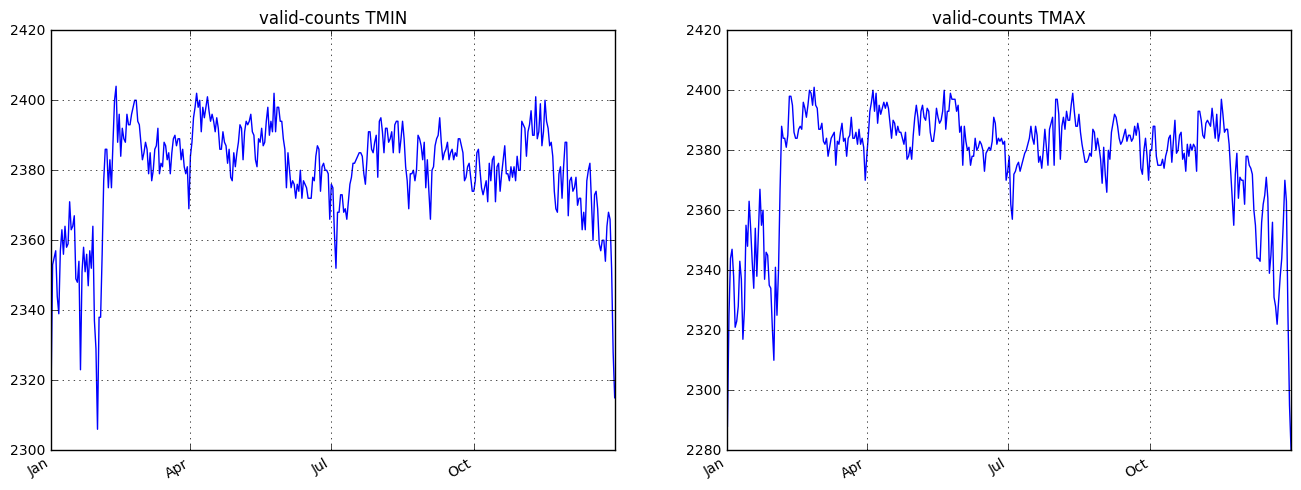

In [11]:
plot_pair(['TMIN','TMAX'],plot_valid)

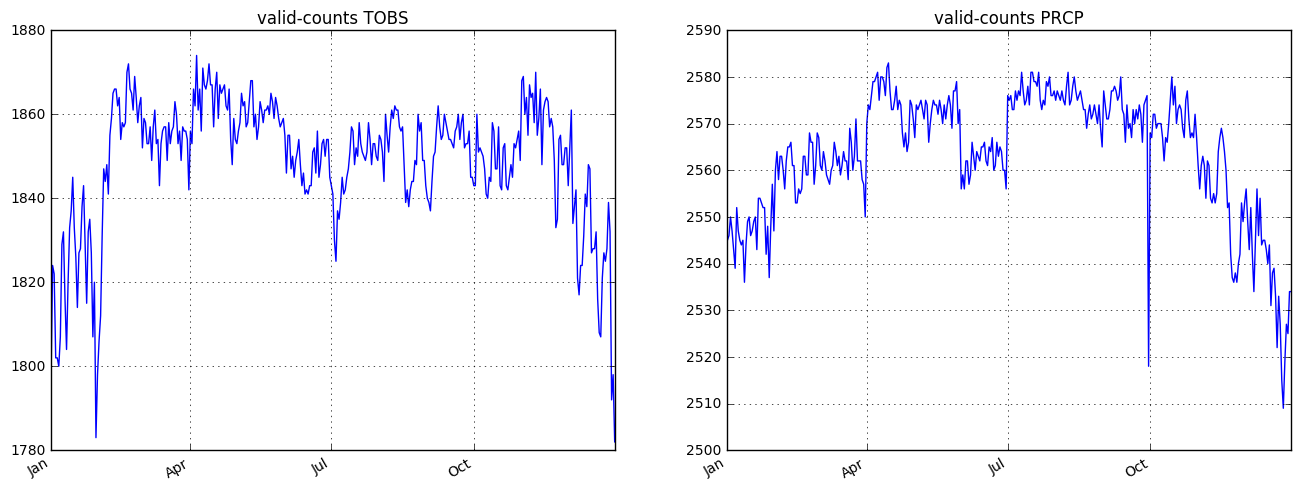

In [12]:
plot_pair(['TOBS','PRCP'],plot_valid)

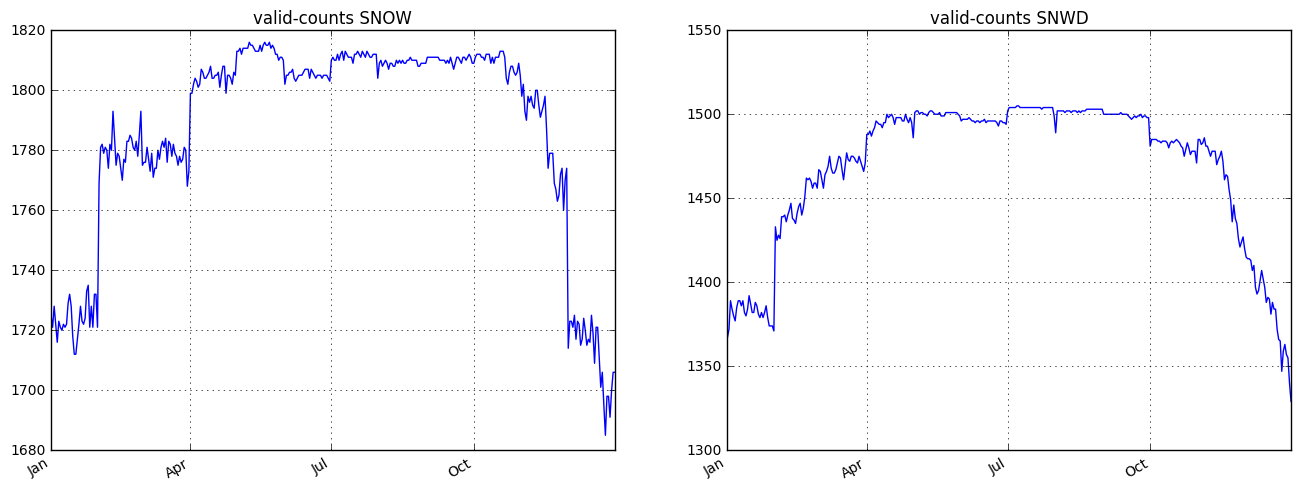

In [13]:
plot_pair(['SNOW', 'SNWD'],plot_valid)

### Plots of mean and std of observations

In [14]:
def plot_mean_std(m,fig,axis):
    mean=STAT[m]['Mean']
    std=np.sqrt(STAT[m]['Var'])
    graphs=np.vstack([mean-std,mean,mean+std]).transpose()
    YP.plot(graphs,fig,axis,title='Mean+-std   '+m)

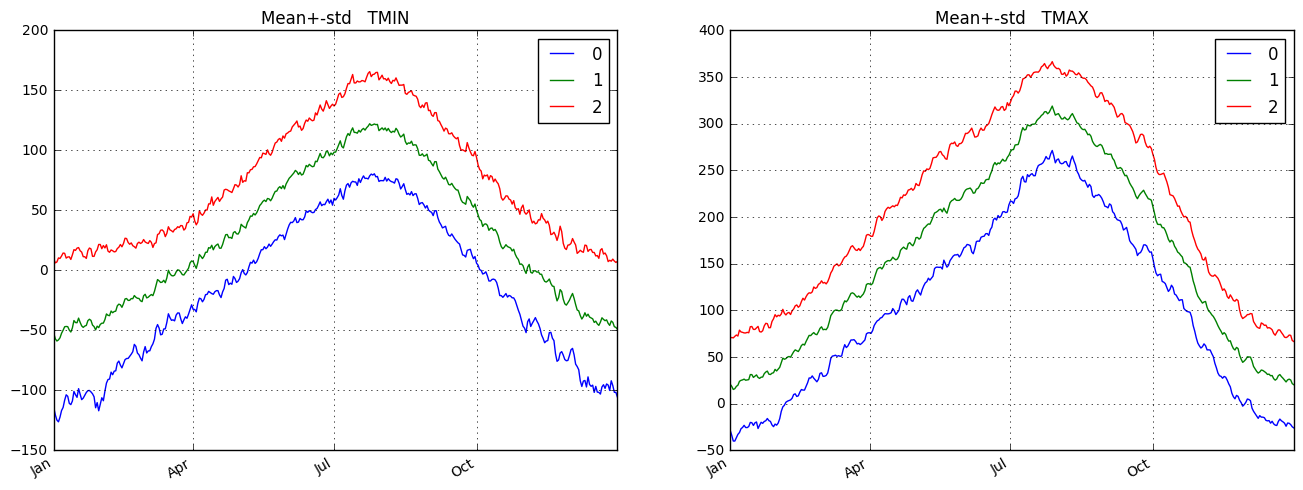

In [15]:
plot_pair(['TMIN','TMAX'],plot_mean_std)

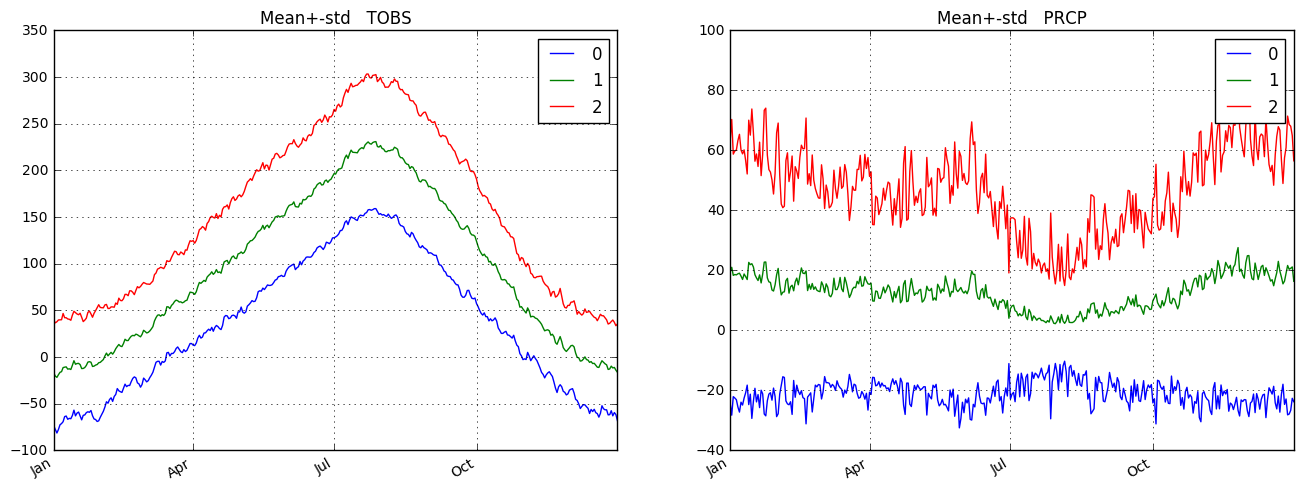

In [16]:
plot_pair(['TOBS','PRCP'],plot_mean_std)

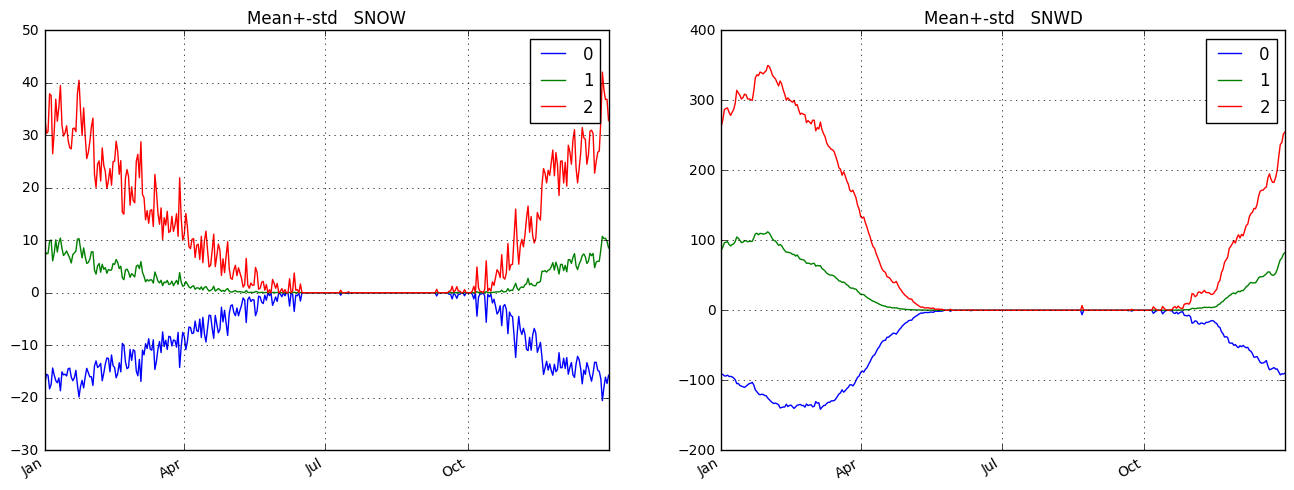

In [17]:
plot_pair(['SNOW', 'SNWD'],plot_mean_std)

### plotting top 3 eigenvectors

In [18]:
def plot_eigen(m,fig,axis):
    EV=STAT[m]['eigvec']
    YP.plot(EV[:,:3],fig,axis,title='Top Eigenvectors '+m)

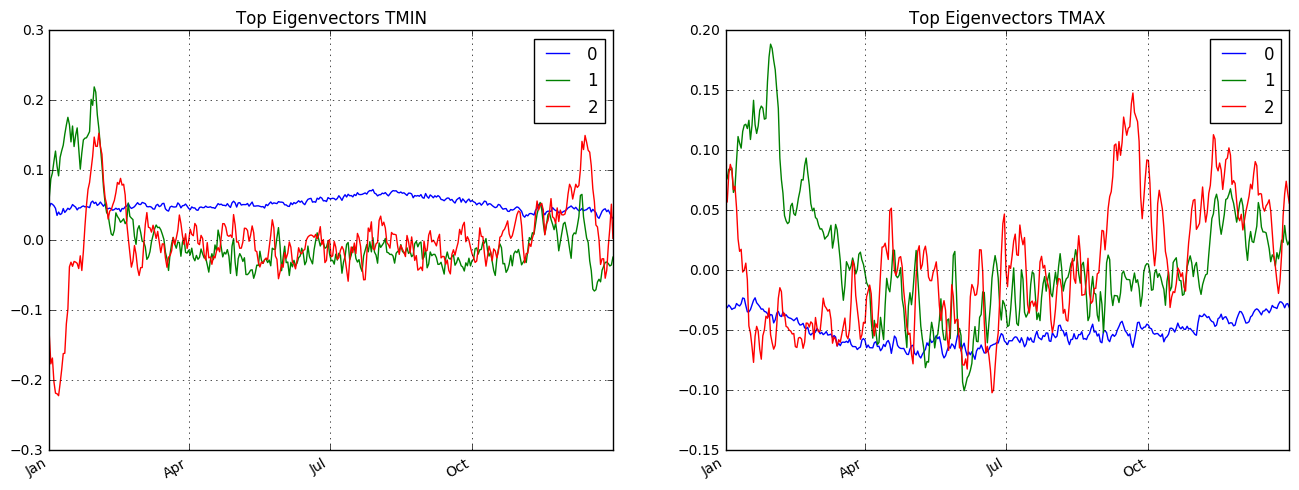

In [19]:
plot_pair(['TMIN','TMAX'],plot_eigen)

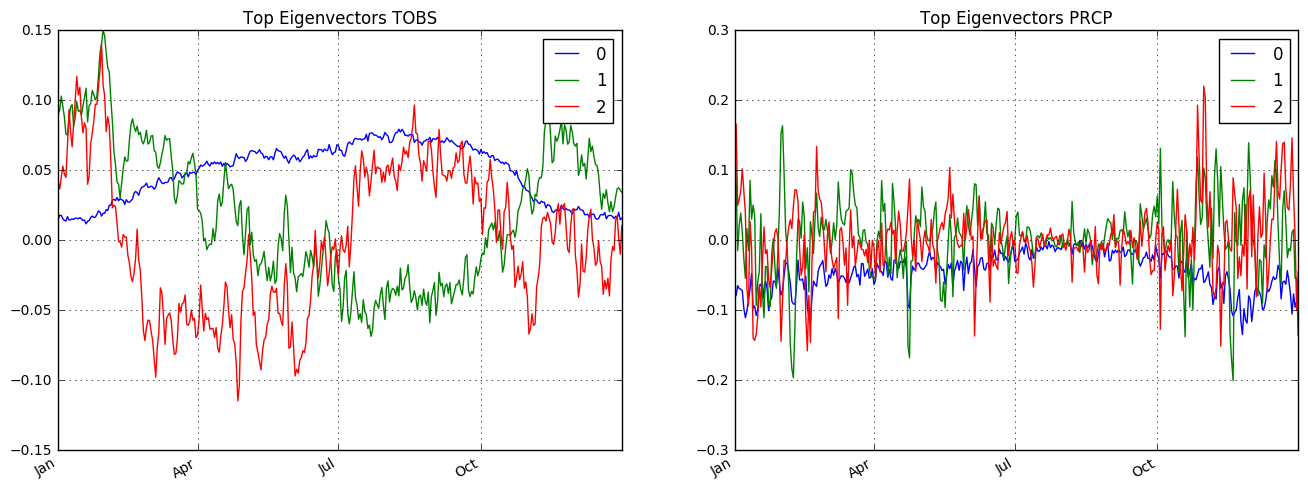

In [20]:
plot_pair(['TOBS','PRCP'],plot_eigen)

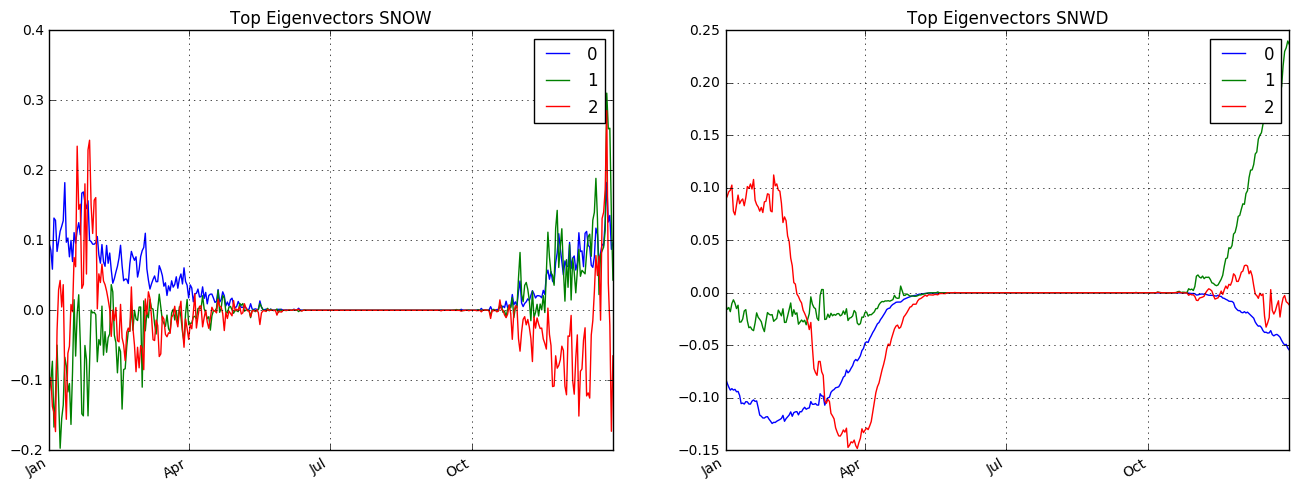

In [21]:
plot_pair(['SNOW', 'SNWD'],plot_eigen)

### Script for plotting percentage of variance explained

In [22]:
def pltVarExplained(j):
    subplot(1,3,j)
    EV=STAT[m]['eigval']
    k=5
    plot(([0,]+list(cumsum(EV[:k])))/sum(EV))
    title('Percentage of Variance Explained for '+ m)
    ylabel('Percentage of Variance')
    xlabel('# Eigenvector')
    grid()
    

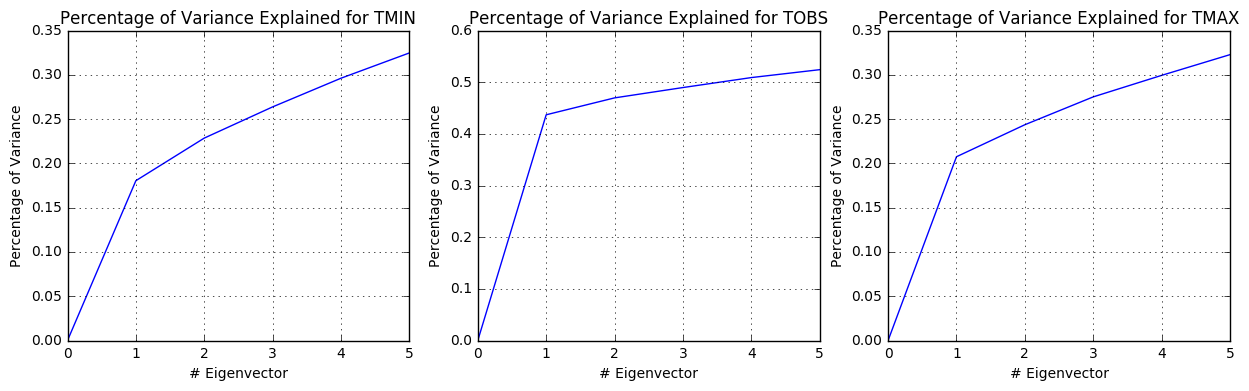

In [23]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['TMIN', 'TOBS', 'TMAX']: #,
    pltVarExplained(j)
    j+=1

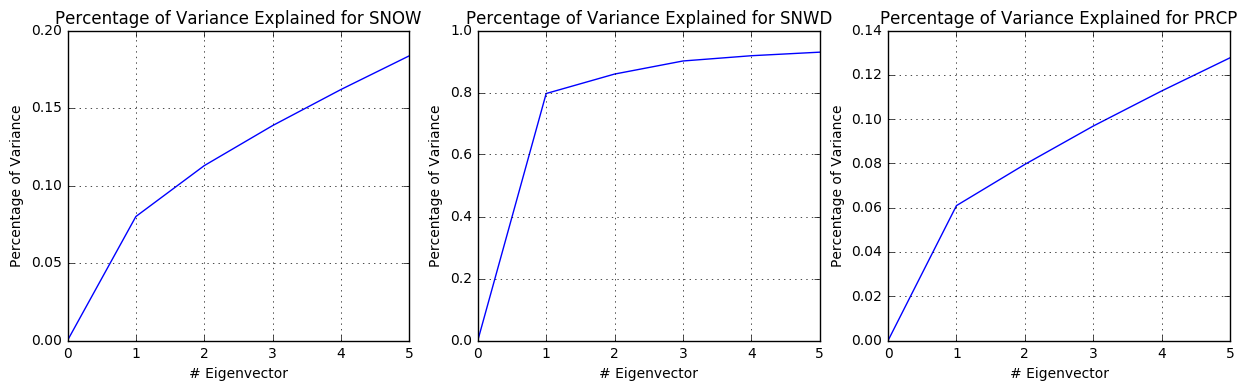

In [24]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['SNOW', 'SNWD', 'PRCP']:
    pltVarExplained(j)
    j+=1 

In [25]:
### How does weather change with elevation?

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']


In [ ]:
#sc.stop()